In [136]:
import pandas as pd
import numpy as np

In [138]:
df_indygo = pd.read_csv('/Users/adityakadam/Downloads/indygo.csv')

In [139]:
columns_to_convert = [
    'DepartTimeSchedule', 
    'DepartTimeActual', 
    'ArriveTimeSchedule', 
    'ArriveTimeActual', 
    'EndTimeSchedule', 
    'EndTimeActual', 
    'CalendarDate'
]

df_indygo[columns_to_convert] = df_indygo[columns_to_convert].apply(pd.to_datetime, errors='coerce')

print(df_indygo[columns_to_convert].head())

   DepartTimeSchedule    DepartTimeActual  ArriveTimeSchedule  \
0 2023-10-07 00:10:08 2023-10-07 00:08:16 2023-10-07 00:11:22   
1 2023-10-07 00:28:41 2023-10-07 00:30:15 2023-10-07 00:29:02   
2 2023-10-07 00:05:54 2023-10-07 00:11:15 2023-10-07 00:06:16   
3 2023-10-07 00:06:16 2023-10-07 00:11:38 2023-10-07 00:07:00   
4 2023-10-07 00:07:00 2023-10-07 00:13:04 2023-10-07 00:07:44   

     ArriveTimeActual     EndTimeSchedule       EndTimeActual CalendarDate  
0 2023-10-07 00:09:23 2023-10-07 00:11:22 2023-10-07 00:09:23   2023-10-06  
1 2023-10-07 00:30:24 2023-10-07 00:29:02 2023-10-07 00:30:24   2023-10-06  
2 2023-10-07 00:11:38 2023-10-07 00:06:16 2023-10-07 00:11:38   2023-10-06  
3 2023-10-07 00:12:40 2023-10-07 00:07:00 2023-10-07 00:13:04   2023-10-06  
4 2023-10-07 00:13:37 2023-10-07 00:07:44 2023-10-07 00:13:37   2023-10-06  


In [140]:
df_indygo = df_indygo.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [141]:
df_indygo.head()

,DateKey,BlockKey,RouteKey,DepartStopKey,ArriveStopKey,TripKey,UserKey,VehicleKey,TripSequence,ArriveBoards,...,EndTimeVarianceSecs,TotalTimeScheduleSecs,TotalTimeActualSecs,TotalTimeVarianceSecs,CalendarDate,DayOfWeekName,WorkdayType,RouteInternetName,RouteDepartInternetName,RouteArrivalInternetName
0,9313,1369,2001,1700,5559,180233,1071,2900,70,0,...,-119,74,67,-7,2023-10-06,Friday,Weekday,10th Street,10th Street,10th Street
1,9313,1545,2007,2974,16278,180058,2537,3243,20,0,...,82,21,9,-12,2023-10-06,Friday,Weekday,Washington,Washington,Washington
2,9313,1404,1995,5063,5064,181608,1476,3256,23,0,...,322,22,23,1,2023-10-06,Friday,Weekday,East 38th St,East 38th St,East 38th St
3,9313,1404,1995,5064,5066,181608,1476,3256,24,0,...,364,44,86,42,2023-10-06,Friday,Weekday,East 38th St,East 38th St,East 38th St
4,9313,1404,1995,5066,5068,181608,1476,3256,25,0,...,353,44,33,-11,2023-10-06,Friday,Weekday,East 38th St,East 38th St,East 38th St


In [142]:
df_indygo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513694 entries, 0 to 19513693
Data columns (total 33 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   DateKey                   int64         
 1   BlockKey                  int64         
 2   RouteKey                  int64         
 3   DepartStopKey             int64         
 4   ArriveStopKey             int64         
 5   TripKey                   int64         
 6   UserKey                   int64         
 7   VehicleKey                int64         
 8   TripSequence              int64         
 9   ArriveBoards              int64         
 10  ArriveAlights             int64         
 11  ArriveOnboard             int64         
 12  DepartBoards              int64         
 13  DepartAlights             int64         
 14  DepartOnboard             int64         
 15  DepartTimeSchedule        datetime64[ns]
 16  DepartTimeActual          datetime64[ns]
 17  Depart

In [143]:
df_indygo['CalendarDate'] = pd.to_datetime(df_indygo['CalendarDate'], format='%Y-%m-%d')


start_date = '2024-03-01'
end_date = '2024-06-30'


df_indygo_filtered = df_indygo[(df_indygo['CalendarDate'] >= start_date) & (df_indygo['CalendarDate'] <= end_date)]

## Questions


What is the overall monthly on-time performance by day of service (Weekday, Saturday, Sunday )?

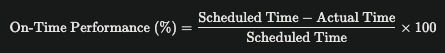

DayOfWeekName

TotalTimeVarianceSec

TotalTimeActualSecs

In [144]:
df_indygo_q1 = df_indygo_filtered[['DepartTimeSchedule', 
    'DepartTimeActual', 
    'ArriveTimeSchedule', 
    'ArriveTimeActual', 
    'EndTimeSchedule', 
    'EndTimeActual',
    'TotalTimeVarianceSecs',
    'TotalTimeActualSecs',
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [145]:
df_indygo_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982117 entries, 11531577 to 19513693
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   DepartTimeSchedule     datetime64[ns]
 1   DepartTimeActual       datetime64[ns]
 2   ArriveTimeSchedule     datetime64[ns]
 3   ArriveTimeActual       datetime64[ns]
 4   EndTimeSchedule        datetime64[ns]
 5   EndTimeActual          datetime64[ns]
 6   TotalTimeVarianceSecs  int64         
 7   TotalTimeActualSecs    int64         
 8   CalendarDate           datetime64[ns]
 9   DayOfWeekName          object        
 10  WorkdayType            object        
dtypes: datetime64[ns](7), int64(2), object(2)
memory usage: 730.8+ MB


In [146]:
df_depart_time_otp = df_indygo_filtered[['DepartTimeSchedule', 
    'DepartTimeActual', 
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [147]:
df_depart_time_otp.memory_usage(deep=True).sum().item()

1150965845

In [148]:
df_arrive_time_otp =df_indygo_filtered[[
    'ArriveTimeSchedule', 
    'ArriveTimeActual', 
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [149]:
df_arrive_time_otp.memory_usage(deep=True).sum().item()

1150965845

In [150]:
df_end_time_otp = df_indygo_filtered[[ 
    'EndTimeSchedule', 
    'EndTimeActual',
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [151]:
df_end_time_otp.memory_usage(deep=True).sum().item()

1150965845

In [152]:
df_total_time_otp = df_indygo_filtered[[
    'TotalTimeVarianceSecs',
    'TotalTimeActualSecs',
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [153]:
df_total_time_otp.memory_usage(deep=True).sum().item()

1150965845

How does OTP vary across different route categories - service frequency, rapid transit)?

RouteKey

RouteInternetName

TotalTimeScheduleSecs

TotalTimeActualSecs

TotalTimeVarianceSecs

DepartTimeSchedule / DepartTimeActual / DepartTimeVarianceSecs

ArriveTimeSchedule / ArriveTimeActual / ArriveTimeVarianceSecs

DayOfWeekName

WorkdayType

TripKey

In [154]:
df_indygo_q23456 = df_indygo_filtered[[
    'RouteKey',
    'RouteInternetName',
    'TotalTimeScheduleSecs',
    'TotalTimeActualSecs',
    'TotalTimeVarianceSecs',
    'DepartTimeSchedule',
    'DepartTimeActual',
    'DepartTimeVarianceSecs',
    'ArriveTimeSchedule',
    'ArriveTimeActual',
    'ArriveTimeVarianceSecs',
    'DayOfWeekName',
    'WorkdayType',
    'TripKey'
]]


In [155]:
df_indygo_q23456.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982117 entries, 11531577 to 19513693
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   RouteKey                int64         
 1   RouteInternetName       object        
 2   TotalTimeScheduleSecs   int64         
 3   TotalTimeActualSecs     int64         
 4   TotalTimeVarianceSecs   int64         
 5   DepartTimeSchedule      datetime64[ns]
 6   DepartTimeActual        datetime64[ns]
 7   DepartTimeVarianceSecs  int64         
 8   ArriveTimeSchedule      datetime64[ns]
 9   ArriveTimeActual        datetime64[ns]
 10  ArriveTimeVarianceSecs  int64         
 11  DayOfWeekName           object        
 12  WorkdayType             object        
 13  TripKey                 int64         
dtypes: datetime64[ns](4), int64(7), object(3)
memory usage: 913.5+ MB


In [156]:
df_depart_route_otp = df_indygo_filtered[[
    'RouteKey',
    'RouteInternetName',
    'TripKey',
    'DepartTimeSchedule', 
    'DepartTimeActual',
    'DepartTimeVarianceSecs',
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [157]:
df_depart_route_otp.memory_usage(deep=True).sum().item()

1827280919

In [158]:
df_depart_route_otp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982117 entries, 11531577 to 19513693
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   RouteKey                int64         
 1   RouteInternetName       object        
 2   TripKey                 int64         
 3   DepartTimeSchedule      datetime64[ns]
 4   DepartTimeActual        datetime64[ns]
 5   DepartTimeVarianceSecs  int64         
 6   CalendarDate            datetime64[ns]
 7   DayOfWeekName           object        
 8   WorkdayType             object        
dtypes: datetime64[ns](3), int64(3), object(3)
memory usage: 609.0+ MB


In [159]:
df_arrive_route_otp = df_indygo_filtered[[
    'RouteKey',
    'RouteInternetName',
    'TripKey',
    'ArriveTimeSchedule', 
    'ArriveTimeActual',
    'ArriveTimeVarianceSecs', 
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [160]:
df_arrive_route_otp.memory_usage(deep=True).sum().item()


1827280919

In [161]:
df_arrive_route_otp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982117 entries, 11531577 to 19513693
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   RouteKey                int64         
 1   RouteInternetName       object        
 2   TripKey                 int64         
 3   ArriveTimeSchedule      datetime64[ns]
 4   ArriveTimeActual        datetime64[ns]
 5   ArriveTimeVarianceSecs  int64         
 6   CalendarDate            datetime64[ns]
 7   DayOfWeekName           object        
 8   WorkdayType             object        
dtypes: datetime64[ns](3), int64(3), object(3)
memory usage: 609.0+ MB


In [162]:
df_end_route_otp = df_indygo_filtered[[ 
    'RouteKey',
    'RouteInternetName',
    'TripKey',
    'EndTimeSchedule', 
    'EndTimeActual',
    'EndTimeVarianceSecs',
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [163]:
df_end_route_otp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982117 entries, 11531577 to 19513693
Data columns (total 9 columns):
 #   Column               Dtype         
---  ------               -----         
 0   RouteKey             int64         
 1   RouteInternetName    object        
 2   TripKey              int64         
 3   EndTimeSchedule      datetime64[ns]
 4   EndTimeActual        datetime64[ns]
 5   EndTimeVarianceSecs  int64         
 6   CalendarDate         datetime64[ns]
 7   DayOfWeekName        object        
 8   WorkdayType          object        
dtypes: datetime64[ns](3), int64(3), object(3)
memory usage: 609.0+ MB


In [164]:
df_end_route_otp.memory_usage(deep=True).sum().item()

1827280919

In [165]:
df_total_route_otp = df_indygo_filtered[[ 
    'RouteKey',
    'RouteInternetName',
    'TripKey',
    'TotalTimeScheduleSecs',
    'TotalTimeActualSecs',
    'TotalTimeVarianceSecs',
    'CalendarDate',
    'DayOfWeekName',
    'WorkdayType']]

In [166]:
df_total_route_otp.memory_usage(deep=True).sum().item()

1827280919

In [167]:
df_total_route_otp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7982117 entries, 11531577 to 19513693
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   RouteKey               int64         
 1   RouteInternetName      object        
 2   TripKey                int64         
 3   TotalTimeScheduleSecs  int64         
 4   TotalTimeActualSecs    int64         
 5   TotalTimeVarianceSecs  int64         
 6   CalendarDate           datetime64[ns]
 7   DayOfWeekName          object        
 8   WorkdayType            object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 609.0+ MB


In [ ]:
df_arrive_route_otp.to_csv('arrive_route_otp.csv',index=False)
df_arrive_time_otp.to_csv('arrive_time_otp.csv',index=False)
df_depart_route_otp.to_csv('depart_route_otp.csv',index=False)
df_depart_time_otp.to_csv('depart_time_otp.csv',index=False)
df_end_route_otp.to_csv('end_route_otp.csv',index=False)
df_end_time_otp.to_csv('end_time_otp..csv',index=False)
df_total_route_otp.to_csv('total_route_otp.csv',index=False)
df_total_time_otp.to_csv('total_time_otp.csv',index=False)

What is the OTP trend for specific routes over the past 12 months?

RouteKey

CalendarDate

TotalTimeScheduleSecs

TotalTimeActualSecs

TotalTimeVarianceSecs

DepartTimeSchedule

DepartTimeActual

DepartTimeVarianceSecs

ArriveTimeSchedule

ArriveTimeActual

ArriveTimeVarianceSecs

How does OTP change across different time frames (e.g., monthly, by bid period, or over the last five weeks)?

CalendarDate

TotalTimeScheduleSecs

TotalTimeActualSecs

TotalTimeVarianceSecs

DepartTimeSchedule

DepartTimeActual

DepartTimeVarianceSecs

ArriveTimeSchedule

ArriveTimeActual

ArriveTimeVarianceSecs

What is the change in OTP by month, year, or week?

CalendarDate

TotalTimeScheduleSecs

TotalTimeActualSecs

TotalTimeVarianceSecs

DepartTimeSchedule

DepartTimeActual

DepartTimeVarianceSecs

ArriveTimeSchedule

ArriveTimeActual

ArriveTimeVarianceSecs

How does OTP differ during peak vs. non-peak hours?

CalendarDate

DepartTimeSchedule

DepartTimeActual

DepartTimeVarianceSecs

ArriveTimeSchedule

ArriveTimeActual

ArriveTimeVarianceSecs

TotalTimeScheduleSecs

TotalTimeActualSecs

TotalTimeVarianceSecs